# Earthquake dataset analysis with logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

## Read data

In [2]:
path_to_earthquake_file = "./earthquake.txt"

In [3]:
earthquake_X = pd.read_csv(path_to_earthquake_file, sep =" ")

# 'equake' = 1
# 'explosn' = 0
earthquake_y = np.array(earthquake_X["popn"] == "equake").astype(int)
earthquake_X.drop("popn", inplace=True, axis=1) 

print(earthquake_X.shape)
earthquake_X.head()

(29, 2)


,body,surface
0,5.60,4.25
1,5.18,3.93
2,6.31,6.30
3,5.36,4.49
4,5.96,6.39


## Analysis

Make scatterplot for variables body and surface. Mark classes corresponding to
observations.

In [4]:
def draw_scatter(X, y, title): 
    sns.set_style("white")
    plt.figure(figsize=(8,6))
    plt.scatter(X["body"], X["surface"], c=y, cmap='viridis', edgecolors='black', alpha=0.8)
    plt.title(title)
    plt.grid(True, linewidth=0.7, alpha=0.6)
    plt.show()

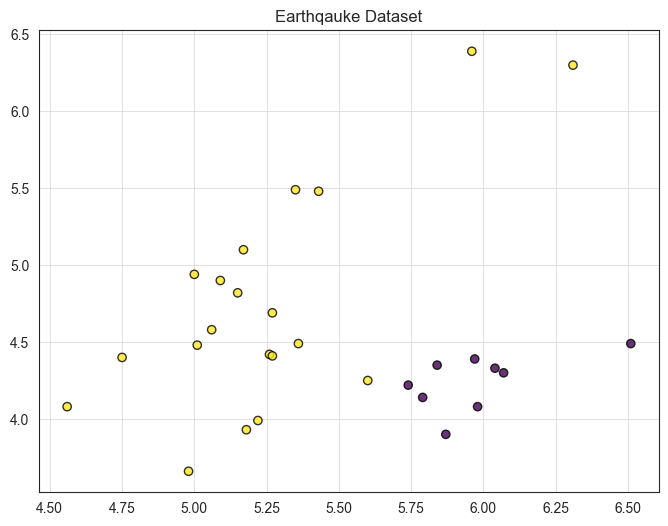

In [5]:
draw_scatter(earthquake_X, earthquake_y, "Earthqauke Dataset")

Estimated Coefficients: [[-146.40894937  151.81204304]]
Intercept: [184.8930899]
Estimated Probabilities: [9.99962985e-01 9.99999000e-01 9.99999000e-01 9.99999000e-01
 9.99999000e-01 9.99999000e-01 9.99999000e-01 9.99999000e-01
 9.99999000e-01 9.99999000e-01 9.99999000e-01 9.99999000e-01
 9.99988901e-01 9.99999000e-01 9.99999000e-01 9.99999000e-01
 9.99999000e-01 9.99999000e-01 9.99999000e-01 9.99999000e-01
 1.00000000e-05 1.00000000e-05 5.81290329e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05]
Log-Likelihood: 7.042970758602492e-06


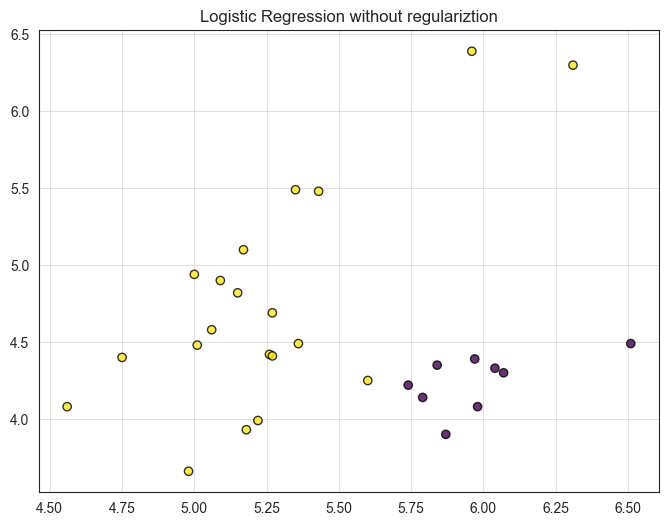

In [6]:
# Logistic regression without regularization
log_reg = LogisticRegression(penalty=None, solver='lbfgs')
log_reg.fit(earthquake_X, earthquake_y)

print("Estimated Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)

probabilities = log_reg.predict_proba(earthquake_X)[:, 1]
probabilities = np.clip(probabilities, 1e-5, 1 - 1e-6)
print("Estimated Probabilities:", probabilities)

log_likelihood = log_loss(earthquake_y, probabilities)
print("Log-Likelihood:", log_likelihood)

log_reg_predictions = log_reg.predict(earthquake_X)
draw_scatter(earthquake_X, log_reg_predictions, "Logistic Regression without regulariztion")

Estimated Coefficients: [[-2.16923577  1.18171285]]
Intercept: [7.46941588]
Estimated Probabilities: [0.58515581 0.70618067 0.77317544 0.7591825  0.89011495 0.78285914
 0.90730822 0.91412562 0.91306196 0.86939479 0.77710887 0.82917288
 0.72942175 0.70287777 0.87049333 0.9018896  0.88013483 0.91675782
 0.92135479 0.89717773 0.37379938 0.42722008 0.48538663 0.45061948
 0.34179214 0.20645655 0.50120769 0.33598781 0.35058244]
Log-Likelihood: 0.2905193810736332


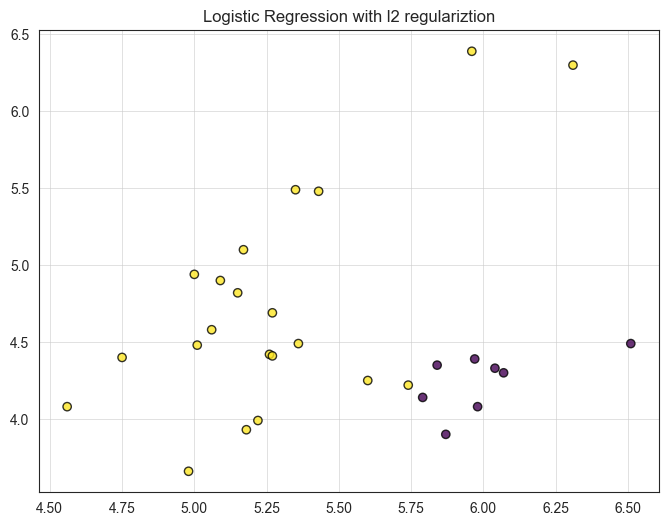

In [7]:
# Logistic regression with l2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', solver='lbfgs')
log_reg_l2.fit(earthquake_X, earthquake_y)

print("Estimated Coefficients:", log_reg_l2.coef_)
print("Intercept:", log_reg_l2.intercept_)

probabilities_l2 = log_reg_l2.predict_proba(earthquake_X)[:, 1]
probabilities_l2 = np.clip(probabilities_l2, 1e-5, 1 - 1e-6)
print("Estimated Probabilities:", probabilities_l2)

log_likelihood = log_loss(earthquake_y, probabilities_l2)
print("Log-Likelihood:", log_likelihood)

log_reg_l2_predictions = log_reg_l2.predict(earthquake_X)
draw_scatter(earthquake_X, log_reg_l2_predictions, "Logistic Regression with l2 regulariztion")